In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import h5py

# Creating nuclei boundary polygons from mosaic images VZ Liver

The Vizgen Liver dataset has mosaic images which stitch together all fields of view and are separate HUGE tif files for each z-slice and stain. For example:

```
12K	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/manifest.json
4.0K	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z0.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z1.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z2.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z3.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z4.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z5.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z6.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z0.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z1.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z2.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z3.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z4.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z5.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z6.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z0.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z1.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z2.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z3.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z4.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z5.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z6.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z1.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z2.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z3.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z4.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z5.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z6.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z0.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z1.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z2.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z3.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z4.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z5.tif
17G	/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_PolyT_z6.tif
```

I think the 3 different Cellbound are 3 different cell-boundary dyes? I'm not sure though

Yes they are 3 different dyes, confirmed with vizgen

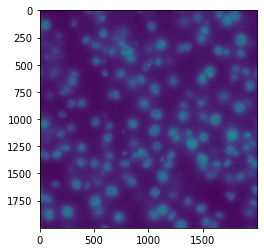

In [2]:
#read in one of the DAPI files
im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif')

#yay I can see the dapi stain!
plt.imshow(im[8000:10000,8000:10000])
plt.show()
plt.close()

In [51]:
im.shape

(90109, 95828)

0

In [62]:
img = im[2002:4128,84565:86561].copy() #NOTE do this to subset
img = im[0:16000,0:16000].copy() #NOTE do this to subset

In [63]:
img.shape

(16000, 16000)

In [ ]:
plt.imshow(im)
plt.show()
plt.close()

In [15]:
#get the transformation matrix
micron_to_mosaic = np.genfromtxt(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv',
    delimiter=' ',
)
mosaic_to_micron = np.linalg.inv(micron_to_mosaic)

In [18]:
x = 120
y = 240



In [28]:
q,z = 
q

-28.65259847735948

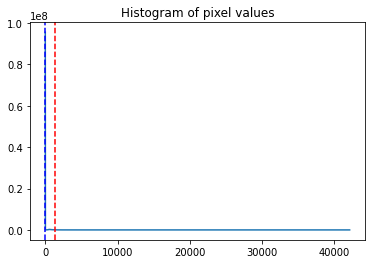

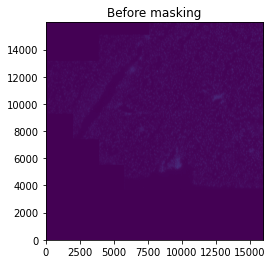

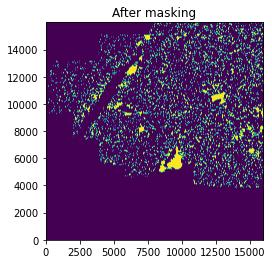

KeyboardInterrupt: 

In [64]:
from skimage.segmentation import watershed, mark_boundaries
from skimage.filters import sobel
from skimage.exposure import histogram
from scipy import ndimage as ndi
from skimage.measure import find_contours, approximate_polygon
from shapely.geometry import Point, Polygon
import geopandas


#Following tutorial here
#https://scikit-image.org/docs/stable/user_guide/tutorial_segmentation.html

#read in one of the DAPI files
#im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif')

#get the transformation matrix
micron_to_mosaic = np.genfromtxt(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv',
    delimiter=' ',
)
mosaic_to_micron = np.linalg.inv(micron_to_mosaic)

#Use quantiles as the masking thresholds
max_noise_thresh,min_signal_thresh = np.quantile(img.flatten(),[0.05,0.9])

#Determine masking thresholds (might have to play with these numbers a lot)
hist, hist_centers = histogram(img)
ax = sns.lineplot(x = hist_centers, y = hist)
ax.axvline(max_noise_thresh,linestyle='dashed',color='blue')
ax.axvline(min_signal_thresh,linestyle='dashed',color='red')

plt.title('Histogram of pixel values')
plt.show()
plt.close()

plt.imshow(img,origin='lower')
plt.title('Before masking')
plt.show()
plt.close()

elevation_map = sobel(img)

markers = np.zeros_like(img)
markers[img < max_noise_thresh] = 1
markers[img > min_signal_thresh] = 2


plt.imshow(markers,origin='lower')
plt.title('After masking')
plt.show()
plt.close()

segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(segmentation,origin='lower')
plt.title('Watershed segmented')
plt.show()
plt.close()

#THIS GIVES BACK (y,x) for some reason!!
#followed tutorial here: https://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py
raw_nuclei_polys = find_contours(segmentation,0)

fig = plt.plot()
plt.imshow(img,origin='lower')
micron_nuclei_polys = []
for raw_p in raw_nuclei_polys:
    mosaic_coords = approximate_polygon(raw_p, tolerance=2.5) #simplifying the polygons saves a lot of space and looks good still
    
    #skip polygons without at least 3 vertices
    num_vertices,_ = mosaic_coords.shape
    if num_vertices < 3:
        continue
    
    #converting from mosaic to micron coordinates
    nrows,ncols = mosaic_coords.shape
    micron_coords = np.matmul(
        mosaic_to_micron,
        np.vstack((mosaic_coords.T,np.ones((1,nrows)))),
    )
    
    #NOTE switching to be (x,y) tuples
    y,x,z = micron_coords
    
    #NOTE
    #micron_nuclei_polys.append(Polygon(zip(x,y)))
    
    micron_nuclei_polys.append(Polygon(mosaic_coords))
    
    #plt.plot(raw_p[:,1],raw_p[:,0]) #reversed plotting than I'd expect
    plt.plot(mosaic_coords[:,1],mosaic_coords[:,0]) #reversed plotting than I'd expect

plt.show()
plt.title('Boundaries superimposed')
plt.close()
    
#Write out results to a GeoPandas dataframe
gdf = geopandas.GeoDataFrame({
    'geometry':micron_nuclei_polys,
})
gdf['area'] = gdf.area
#gdf['centroid'] = gdf.centroid #can't save with multiple geometries
gdf.to_file('sub_test.gpkg', driver='GPKG') #GPKG saves out a single file instead of many as shp does



In [50]:
np.unique(markers)

array([0, 1, 2], dtype=uint16)

# Reading back in the nuclei for filtering and assigning to cells

In [37]:
nuc_df = geopandas.GeoDataFrame.from_file('sub_test.gpkg')
nuc_df

,area,geometry
0,225388.5,"POLYGON ((0.00000 41.00000, 113.00000 41.00000..."
1,2388.5,"POLYGON ((40.00000 494.00000, 35.00000 477.000..."
2,2345.5,"POLYGON ((48.00000 910.00000, 46.00000 903.000..."
3,2901.5,"POLYGON ((51.00000 1251.00000, 48.00000 1240.0..."
4,3967.0,"POLYGON ((75.00000 1757.00000, 65.00000 1750.0..."
...,...,...
103,4910.5,"POLYGON ((2125.00000 1769.00000, 2113.00000 17..."
104,1764.5,"POLYGON ((2125.00000 1541.00000, 2113.00000 15..."
105,737.5,"POLYGON ((2125.00000 647.00000, 2109.00000 648..."
106,655.5,"POLYGON ((2125.00000 85.00000, 2113.00000 84.0..."


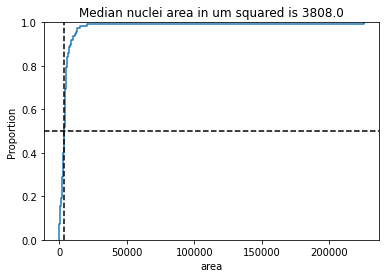

In [38]:
med_area = nuc_df['area'].median()
sns.ecdfplot(nuc_df['area'])
plt.title('Median nuclei area in um squared is {}'.format(med_area))
plt.axhline(0.5,linestyle='dashed',color='black')
plt.axvline(med_area,linestyle='dashed',color='black')
plt.show()
plt.close()

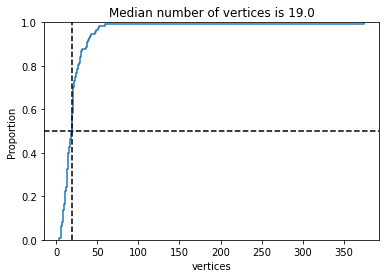

In [39]:
nuc_df['vertices'] = nuc_df['geometry'].apply(lambda p: len(p.exterior.xy[0]))
med_verts = nuc_df['vertices'].median()
sns.ecdfplot(nuc_df['vertices'])
plt.title('Median number of vertices is {}'.format(med_verts))
plt.axhline(0.5,linestyle='dashed',color='black')
plt.axvline(med_verts,linestyle='dashed',color='black')
plt.show()
plt.close()

In [40]:
#Get the bounds of the test nuclei in both micron and pixel coordinates
nuclei_micron_bounds = nuc_df['geometry'].bounds
minx_nuclei_micron = nuclei_micron_bounds['minx'].min()
miny_nuclei_micron = nuclei_micron_bounds['miny'].min()
maxx_nuclei_micron = nuclei_micron_bounds['maxx'].max()
maxy_nuclei_micron = nuclei_micron_bounds['maxy'].max()

micron_nuclei_min_p = np.array([(minx_nuclei_micron, miny_nuclei_micron, 1)]).T
micron_nuclei_max_p = np.array([(maxx_nuclei_micron, maxy_nuclei_micron, 1)]).T

pixel_nuclei_min_p = np.matmul(micron_to_mosaic,micron_nuclei_min_p)
pixel_nuclei_max_p = np.matmul(micron_to_mosaic,micron_nuclei_max_p)

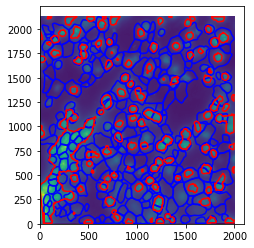

In [41]:
# plot the cell boundaries and the nuclear boundaries together
f = h5py.File(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_boundaries/feature_data_6.hdf5',
    mode='r',
)

boundaries = {}

fov_min_x = None
fov_min_y = None
fov_max_x = None
fov_max_y = None

for cell_id in f['featuredata']:
    boundary = f['featuredata'][cell_id]['zIndex_0']['p_0']['coordinates'][0,:,:] #assuming the order is (z,x,y)?

    #Try to transform the cell
    nrow,ncol = np.shape(boundary)
    affine_boundary = np.hstack((boundary,np.ones((nrow,1)))) #have to add a column of 1's for the transformation
    pixel_boundary = np.matmul(micron_to_mosaic, affine_boundary.T).T #double transpose to make dimensions work

    boundaries[cell_id] = pixel_boundary
    
    
    cell_min_x = pixel_boundary[:,0].min()
    cell_min_y = pixel_boundary[:,1].min()
    cell_max_x = pixel_boundary[:,0].max()
    cell_max_y = pixel_boundary[:,1].max()
    
    fov_min_x = cell_min_x if (fov_min_x is None or fov_min_x > cell_min_x) else fov_min_x
    fov_min_y = cell_min_y if (fov_min_y is None or fov_min_y > cell_min_y) else fov_min_y
    fov_max_x = cell_max_x if (fov_max_x is None or fov_max_x < cell_max_x) else fov_max_x
    fov_max_y = cell_max_y if (fov_max_y is None or fov_max_y < cell_max_y) else fov_max_y
    
    
#Try plotting to see if the transformation worked
fov_min_x = int(fov_min_x)
fov_min_y = int(fov_min_y)
fov_max_x = int(fov_max_x)
fov_max_y = int(fov_max_y)

fig = plt.figure()
im_region = im[fov_min_y:fov_max_y, fov_min_x:fov_max_x] #surprised image is indexed by y's first, then by x's
plt.imshow(im_region, origin='lower')



#plot cell boundaries
for cell_id,boundary in boundaries.items():
    plt.plot(boundary[:,0]-fov_min_x,boundary[:,1]-fov_min_y,color='blue')

#plot nuclei boundaries
for p in nuc_df['geometry']:
    xs,ys = p.exterior.xy
    plt.plot(ys,xs,color='red')

 

    
plt.show()
plt.close()

# FOV regions

Goal is to understand if the FOVs are densely packed on the mosaic image, and if they can be processed separately in parallel

In [4]:
cell_df = pd.read_csv(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_metadata.csv',
    index_col = 0,
)
cell_df

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y
103327291694389284070574461648020091166,0,598.606132,2613.260486,39.071030,2607.378195,2619.142777,33.957236,44.184823
105028411815552368766949841604861213395,0,357.981864,2619.952765,47.211484,2616.449315,2623.456214,41.707339,52.715629
107334985627684286897728970662988248140,0,1460.769021,2508.690251,-20.348288,2499.019789,2518.360712,-28.600103,-12.096473
116035032804455615061806604690343149440,0,452.756232,2415.081099,17.490320,2409.612761,2420.549438,13.062980,21.917661
118414953224566788702908374446885355289,0,1188.031387,2427.046545,71.237096,2419.135628,2434.957462,62.542778,79.931414
...,...,...,...,...,...,...,...,...
83907946090636661420839658858453245286,1796,1127.958981,4801.173880,9485.727714,4792.175819,4810.171941,9478.138140,9493.317287
86090959296083659449193319116250293816,1796,870.721858,4779.482342,9454.871836,4771.676962,4787.287722,9448.140607,9461.603066
87640752896861318148950550714675147697,1796,1523.424156,4797.037665,9470.309174,4786.905129,4807.170201,9461.317032,9479.301317
90860341454897402143725248553752124696,1796,1792.075025,4765.825841,9507.509673,4753.951626,4777.700056,9497.251122,9517.768223


In [6]:
fov_df = cell_df.groupby('fov').agg(
    min_x = ('min_x','min'),
    max_x = ('max_x','max'),
    min_y = ('min_y','min'),
    max_y = ('max_y','max'),
)
fov_df

,min_x,max_x,min_y,max_y
fov,,,,
0,2406.278043,2623.456214,-106.683484,114.330699
1,8484.748783,8693.706571,-77.929877,135.286636
2,8673.985951,8895.773243,57.583213,143.688989
3,8888.170344,9095.911406,-71.685265,138.085260
4,9493.053342,9613.864962,109.586763,340.972967
...,...,...,...,...
1792,5422.463987,5618.357428,9405.559011,9605.119920
1793,5203.065891,5437.330495,9406.741280,9610.755486
1794,4998.690648,5217.239304,9404.806721,9591.855636


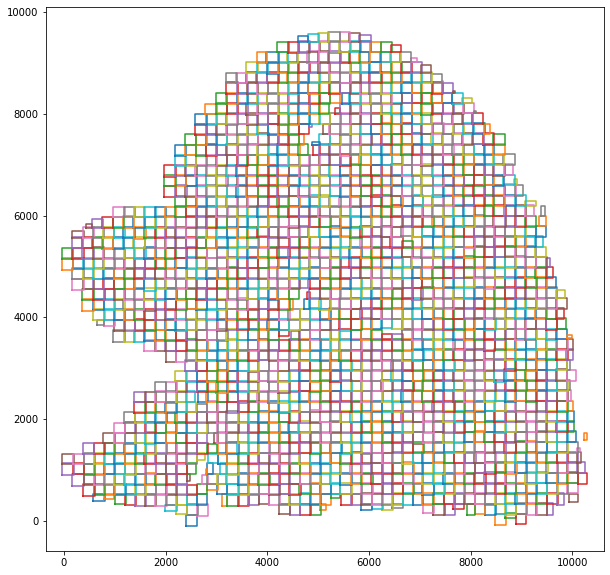

In [12]:
fig = plt.figure(figsize=(10,10))

for i,r in fov_df.iterrows():
    xs = [r['min_x'], r['max_x'], r['max_x'], r['min_x'], r['min_x']]
    ys = [r['min_y'], r['min_y'], r['max_y'], r['max_y'], r['min_y']]
    plt.plot(xs,ys)

plt.axis('equal')
plt.show()
plt.close()

In [13]:
micron_to_mosaic = np.genfromtxt(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv',
    delimiter=' ',
)
micron_to_mosaic

array([[  9.25940132,   0.        , 385.3059082 ],
       [  0.        ,   9.25933266, 999.81787109],
       [  0.        ,   0.        ,   1.        ]])

In [21]:
micron_min_p.shape

(3, 1)

In [22]:
min_x

array([22666.])

In [23]:
pixel_min_p[0,]

array([[2.2666e+04],
       [1.2000e+01],
       [1.0000e+00]])

In [28]:
max_x

22666.000000000007

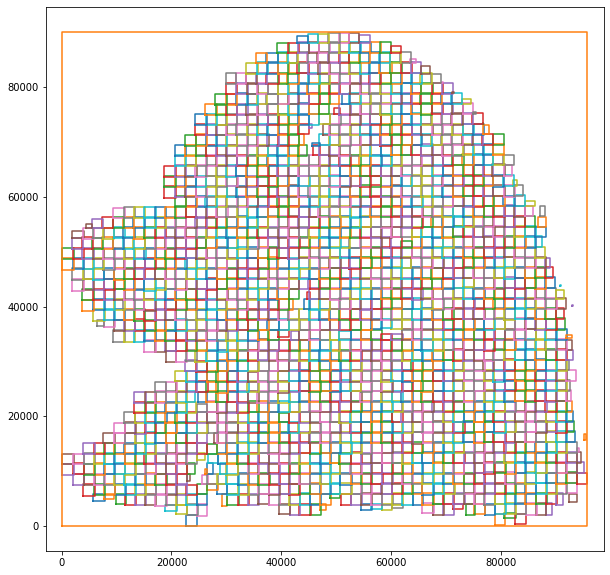

In [33]:
fig = plt.figure(figsize=(10,10))

for i,r in fov_df.iterrows():
    micron_min_p = np.array([[r['min_x']],[r['min_y']],[1]])
    micron_max_p = np.array([[r['max_x']],[r['max_y']],[1]])
    
    pixel_min_p = np.matmul(micron_to_mosaic, micron_min_p)
    pixel_max_p = np.matmul(micron_to_mosaic, micron_max_p)
    
    min_x,min_y = pixel_min_p[0,0],pixel_min_p[1,0]
    max_x,max_y = pixel_max_p[0,0],pixel_max_p[1,0]
    
    xs = [min_x, max_x, max_x, min_x, min_x]
    ys = [min_y, min_y, max_y, max_y, min_y]
    plt.plot(xs,ys)

#Add a box for the mosaic field of view
min_x,min_y = 0,0
max_x,max_y = 95828,90109 #note x and y are flipped in the mosaic
xs = [min_x, max_x, max_x, min_x, min_x]
ys = [min_y, min_y, max_y, max_y, min_y]
plt.plot(xs,ys)

plt.axis('equal')
plt.show()
plt.close()

In [34]:
import h5py

f = h5py.File(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_boundaries/feature_data_1005.hdf5',
    mode = 'r',
)
f

<HDF5 file "feature_data_1005.hdf5" (mode r)>

In [35]:
dict(f.attrs)

{}

In [36]:
f.keys()

<KeysViewHDF5 ['featuredata']>

In [37]:
dict(f['featuredata'].attrs)

{'version': '0.1.11'}

In [38]:
f['featuredata'].keys()

<KeysViewHDF5 ['100163025215920262449489089304731114651', '100917638663015549899024221797633173726', '101601888453273607575500079707256794937', '102699915273256430311488546615073062557', '10459208507424566664816043358536097504', '106960369757995778328646697073372068538', '109075839419046142946374645275883864657', '110466238247691664573773452406244091020', '111673677299024542004840902418710659021', '11283434595237157027111217959619256094', '116275891143851566103214971768124786836', '117601679222504876886574961785442087415', '117974103680574857434940769227129748427', '118733645739545326349047586780815688101', '11901812806068610866343578764167884265', '121624532612000485484020199878346661282', '123471615849398166785264592128348261698', '125882549407596268280453531217935007470', '129800615990368402942863242269975943333', '13007404977400272133743002648467177206', '130792470430960020011337052698194175454', '134713976245198449282617790347606658623', '135743580990615990016812039425951072746', 

In [44]:
f['featuredata']['94820469945071588014342325903501487068'].attrs['bounding_box']

array([5013.57982181, 4749.82851501, 5027.38059461, 4766.12339244])

# Reading in the cell boundary staining files

Don't need these images to create the nuclei boundaries

They were already used to create the cell-boundary polygons

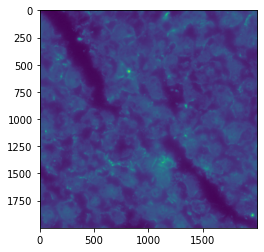

In [41]:
#read in one of the Cellbound files
im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound1_z0.tif')

#view the same window as the dapi above
plt.imshow(im[8000:10000,8000:10000])
plt.show()
plt.close()

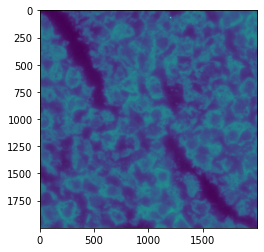

In [42]:
#read in one of the Cellbound files
im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound2_z0.tif')

#view the same window as the dapi above
plt.imshow(im[8000:10000,8000:10000])
plt.show()
plt.close()

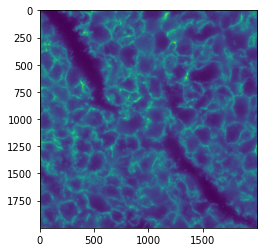

In [43]:
#read in one of the Cellbound files
im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_Cellbound3_z0.tif')

#view the same window as the dapi above
plt.imshow(im[8000:10000,8000:10000])
plt.show()
plt.close()

### How do I convert from pixels to the same coordinate system as the cell-boundaries?

Are they already in the same coordinate system?

Probably not since there is a file called:

/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv

This is just a 3 by 3 matrix, is it a transformation matrix?

In [ ]:
#reading in the associated DAPI image
im = io.imread('/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif')
plt.show()
plt.close()

In [68]:
#get the transformation matrix
micron_to_mosaic = np.genfromtxt(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv',
    delimiter=' ',
)
micron_to_mosaic

array([[  9.25940132,   0.        , 385.3059082 ],
       [  0.        ,   9.25933266, 999.81787109],
       [  0.        ,   0.        ,   1.        ]])

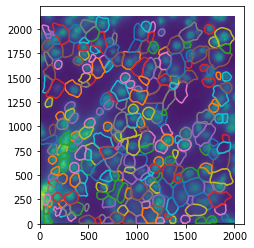

In [113]:
# read in one of the cell boundary fov's
f = h5py.File(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_boundaries/feature_data_6.hdf5',
    mode='r',
)

boundaries = {}

fov_min_x = None
fov_min_y = None
fov_max_x = None
fov_max_y = None

for cell_id in f['featuredata']:
    boundary = f['featuredata'][cell_id]['zIndex_0']['p_0']['coordinates'][0,:,:] #assuming the order is (z,x,y)?

    #Try to transform the cell
    nrow,ncol = np.shape(boundary)
    affine_boundary = np.hstack((boundary,np.ones((nrow,1)))) #have to add a column of 1's for the transformation
    pixel_boundary = np.matmul(micron_to_mosaic, affine_boundary.T).T #double transpose to make dimensions work

    boundaries[cell_id] = pixel_boundary
    
    
    cell_min_x = pixel_boundary[:,0].min()
    cell_min_y = pixel_boundary[:,1].min()
    cell_max_x = pixel_boundary[:,0].max()
    cell_max_y = pixel_boundary[:,1].max()
    
    fov_min_x = cell_min_x if (fov_min_x is None or fov_min_x > cell_min_x) else fov_min_x
    fov_min_y = cell_min_y if (fov_min_y is None or fov_min_y > cell_min_y) else fov_min_y
    fov_max_x = cell_max_x if (fov_max_x is None or fov_max_x < cell_max_x) else fov_max_x
    fov_max_y = cell_max_y if (fov_max_y is None or fov_max_y < cell_max_y) else fov_max_y
    
    
#Try plotting to see if the transformation worked
fov_min_x = int(fov_min_x)
fov_min_y = int(fov_min_y)
fov_max_x = int(fov_max_x)
fov_max_y = int(fov_max_y)

fig = plt.figure()
im_region = im[fov_min_y:fov_max_y, fov_min_x:fov_max_x] #surprised image is indexed by y's first, then by x's
plt.imshow(im_region, origin='lower')

for cell_id,boundary in boundaries.items():
    plt.plot(boundary[:,0]-fov_min_x,boundary[:,1]-fov_min_y)
plt.show()
plt.close()

In [115]:
(fov_min_y,fov_max_y)

(2002, 4128)

In [116]:
(fov_min_x,fov_max_x)

(84565, 86561)

In [3]:
import h5py

f = h5py.File(
    '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_boundaries/feature_data_6.hdf5',
    mode='r',
)

f.keys()

<KeysViewHDF5 ['featuredata']>

In [5]:
f['featuredata'].keys()

<KeysViewHDF5 ['100463084293592514622205124537152835805', '102617215315426344903781424182251869173', '103691065299155320934791595451313524017', '104534349052665993072041726661903191616', '106252640289315260073814890028388360700', '106405928907571929622473979176118608146', '1080824296711833376290497692351069099', '108738938830363470368659654705553907448', '109358397398514015020023614434857492921', '113949636471588335749911694926150011367', '114159438736233273531190494842326219127', '115881116786863015246466247986429032329', '117435715406922596784806450511982073462', '118082475596077464610283491224877921207', '120196517503386902045167036690467648214', '121110851836589760088436596064301737920', '121351320604440947998303398884635218095', '123363310878037046015713740946414213759', '12413183499843003028234456433260552512', '125017530712055823167067447654750694108', '126640295883635503726598819379101657753', '126748882231285449446407272756329282818', '127701444496190484942265639384689933062',

# Sandbox for nf script

In [32]:
transform = '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/micron_to_mosaic_pixel_transform.csv'
mosaic = '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif'
hdf5_fov = '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/cell_boundaries/feature_data_6.hdf5'


Num cells  245
Num nucs  88


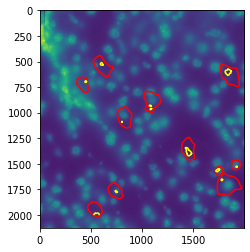

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

from skimage import io
from skimage.segmentation import watershed, mark_boundaries
from skimage.filters import sobel
from skimage.exposure import histogram
from scipy import ndimage as ndi
from skimage.measure import find_contours, approximate_polygon
from shapely.geometry import Point, Polygon
import geopandas


#Read in the pixel to micron scaling and make helper functions
A_micron_to_mosaic = np.genfromtxt(
    transform,
    delimiter=' ',
)
A_mosaic_to_micron = np.linalg.inv(A_micron_to_mosaic)#get the opposite direction transformation matrix

pixel_to_micron = lambda x,y: np.matmul(A_mosaic_to_micron,[[x],[y],[1]])[:2].flatten()
micron_to_pixel = lambda x,y: np.matmul(A_micron_to_mosaic,[[x],[y],[1]])[:2].flatten()


#Read in the DAPI stain image
#im = io.imread(mosaic) #NOTE

#Get the fov bounds in pixels to subset the DAPI image
fov_micron_min_x = None
fov_micron_min_y = None
fov_micron_max_x = None
fov_micron_max_y = None

with h5py.File(hdf5_fov,'r') as f:
    for cell_id in f['featuredata']:
        micron_min_x,micron_min_y,micron_max_x,micron_max_y = f['featuredata'][cell_id].attrs['bounding_box']

        if not fov_micron_min_x or micron_min_x < fov_micron_min_x:
            fov_micron_min_x = micron_min_x
        if not fov_micron_min_y or micron_min_y < fov_micron_min_y:
            fov_micron_min_y = micron_min_y
        if not fov_micron_max_x or micron_max_x > fov_micron_max_x:
            fov_micron_max_x = micron_max_x
        if not fov_micron_max_y or micron_max_y > fov_micron_max_y:
            fov_micron_max_y = micron_max_y

fov_pixel_min_x,fov_pixel_min_y = micron_to_pixel(fov_micron_min_x, fov_micron_min_y)
fov_pixel_max_x,fov_pixel_max_y = micron_to_pixel(fov_micron_max_x, fov_micron_max_y)

fov_img = im[
    int(fov_pixel_min_y):int(fov_pixel_max_y),
    int(fov_pixel_min_x):int(fov_pixel_max_x)
]

#Use quantiles as the masking thresholds
max_noise_thresh,min_signal_thresh = np.quantile(fov_img.flatten(),[0.2,0.95])

elevation_map = sobel(fov_img)

markers = np.zeros_like(fov_img)
markers[fov_img < max_noise_thresh] = 1
markers[fov_img > min_signal_thresh] = 2

segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(fov_img)


#THIS GIVES BACK (y,x) for some reason!!
#followed tutorial here: https://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html#sphx-glr-auto-examples-edges-plot-polygon-py
raw_nuclei_polys = find_contours(segmentation,0)


micron_nuclei_polys = []
cell_ids = []

#Iterate through returned nuclei polys and test if they fit within any of the cell boundaries
with h5py.File(hdf5_fov,'r') as f:
    print('Num cells ',len(f['featuredata'].keys()))
    print('Num nucs ',len(raw_nuclei_polys))
    
    for cell_id in f['featuredata']:
        cell = f['featuredata'][cell_id]
        cell_micron_coords = cell['zIndex_0']['p_0']['coordinates'][0,:,:] #NOTE CHANGE z_ind
        
        nrows,ncols = cell_micron_coords.shape
        cell_pixel_coords = np.matmul(
            A_micron_to_mosaic,
            np.vstack((cell_micron_coords.T,np.ones((1,nrows)))),
        ).T
        
        cell_poly = Polygon(cell_pixel_coords[:,:2])
        
        for raw_p in raw_nuclei_polys:
            nuc_pixel_coords = approximate_polygon(raw_p, tolerance=2.5) #simplifying the polygons saves a lot of space and looks good still
            nuc_pixel_coords[:,0] += fov_pixel_min_x
            nuc_pixel_coords[:,1] += fov_pixel_min_y

            #skip polygons without at least 3 vertices
            num_vertices,_ = nuc_pixel_coords.shape
            if num_vertices < 3:
                continue

            nuc_poly = Polygon(nuc_pixel_coords)
            
            #plotting the good ones
            if cell_poly.contains(nuc_poly):
                plt.plot(cell_pixel_coords[:,0]-fov_pixel_min_x, cell_pixel_coords[:,1]-fov_pixel_min_y,color='red')
                plt.plot(nuc_pixel_coords[:,0]-fov_pixel_min_x, nuc_pixel_coords[:,1]-fov_pixel_min_y,color='yellow')
                
                nrows,ncols = nuc_pixel_coords.shape
                nuc_micron_coords = np.matmul(
                    A_mosaic_to_micron,
                    np.vstack((nuc_pixel_coords.T,np.ones((1,nrows)))),
                ).T

                nuc_micron_poly = Polygon(nuc_micron_coords[:,:2])
                
                micron_nuclei_polys.append(nuc_micron_poly)
                cell_ids.append(cell_id)
                
gdf = geopandas.GeoDataFrame({
    'cell_id':cell_ids,
    'geometry':micron_nuclei_polys,
})
gdf['area'] = gdf.area
gdf.to_file('sub_test.gpkg', driver='GPKG') #GPKG saves out a single file instead of many as shp does

plt.show()
plt.close()

In [120]:
gdf

,cell_id,geometry,area
0,100463084293592514622205124537152835805,"POLYGON ((9281.153 276.173, 9280.721 275.525, ...",6.677485
1,1080824296711833376290497692351069099,"POLYGON ((9209.010 209.430, 9208.470 208.350, ...",2.647666
2,121110851836589760088436596064301737920,"POLYGON ((9293.573 172.494, 9292.061 170.874, ...",26.138416
3,176878648904857884446623900754358113191,"POLYGON ((9209.442 212.130, 9208.686 211.698, ...",1.183868
4,178686507639773688441824708046573286729,"POLYGON ((9158.035 165.798, 9157.711 164.070, ...",5.289501
5,212117459883274535523613750128656412848,"POLYGON ((9251.670 259.326, 9251.670 258.462, ...",30.039933
6,285838798347715042265484244973921698874,"POLYGON ((9172.939 300.041, 9172.075 298.745, ...",1.907020
7,295078003196225791291982377176532635672,"POLYGON ((9140.647 183.402, 9139.999 182.430, ...",1.568771
8,323036907448675728476359648236618587887,"POLYGON ((9299.621 273.474, 9299.513 272.502, ...",0.769806
9,330693317641050700368270694318688693969,"POLYGON ((9178.447 226.062, 9178.231 225.306, ...",0.174956


In [125]:
x = geopandas.read_file('/scratch/groups/horence/rob/nextflow_workdirs/SLRRP_preprocessing/work/b3/7dcb9f5a581fbe2ef02c68a62c24a1/cell_nuc.gpkg')
x.shape

(5, 3)

In [124]:
x

,cell_id,area,geometry
0,26227444251542503363545750531662747770,1.504616,"POLYGON ((1255.72580 457.02995, 1255.29381 455..."


In [106]:
fov_pixel_max_x

86561.18120678356

In [105]:
nuc_pixel_coords

array([[2125., 1331.],
       [2118., 1350.],
       [2125., 1362.]])

In [107]:

nuc_pixel_coords

array([[86690.22716242,  1331.        ],
       [86683.22716242,  1350.        ],
       [86690.22716242,  1362.        ]])

In [103]:
len(raw_nuclei_polys)

117

In [ ]:
len()

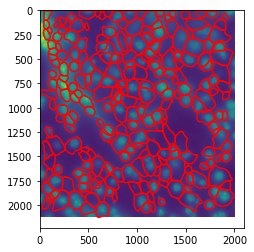

In [91]:
fov_micron_min_x = None
fov_micron_min_y = None
fov_micron_max_x = None
fov_micron_max_y = None

f = h5py.File(hdf5_fov,'r')
for cell_id in f['featuredata']:
    micron_min_x,micron_min_y,micron_max_x,micron_max_y = f['featuredata'][cell_id].attrs['bounding_box']
    
    if not fov_micron_min_x or micron_min_x < fov_micron_min_x:
        fov_micron_min_x = micron_min_x
    if not fov_micron_min_y or micron_min_y < fov_micron_min_y:
        fov_micron_min_y = micron_min_y
    if not fov_micron_max_x or micron_max_x > fov_micron_max_x:
        fov_micron_max_x = micron_max_x
    if not fov_micron_max_y or micron_max_y > fov_micron_max_y:
        fov_micron_max_y = micron_max_y
 
    
fov_pixel_min_x,fov_pixel_min_y = micron_to_pixel(fov_micron_min_x, fov_micron_min_y)
fov_pixel_max_x,fov_pixel_max_y = micron_to_pixel(fov_micron_max_x, fov_micron_max_y)

fov_img = im[
    int(fov_pixel_min_y):int(fov_pixel_max_y),
    int(fov_pixel_min_x):int(fov_pixel_max_x)
]

#Plot it all
plt.imshow(fov_img)

for cell_id in f['featuredata']:
    cell = f['featuredata'][cell_id]
    cell_bounds = cell['zIndex_0']['p_0']['coordinates'][0,:,:]
    nrows,ncols = cell_bounds.shape
    
    cell_pixel_coords = np.matmul(
        A_micron_to_mosaic,
        np.vstack((cell_bounds.T,np.ones((1,nrows)))),
    ).T
        
    plt.plot(cell_pixel_coords[:,0]-fov_pixel_min_x, cell_pixel_coords[:,1]-fov_pixel_min_y,color='red')
    
    #break

plt.show()
plt.close()

In [81]:
cell_pixel_coords = np.matmul(
    A_micron_to_mosaic,
    np.vstack((cell_bounds.T,np.ones((1,nrows)))),
)

cell_pixel_coords.T

array([[8.63150957e+04, 3.53101434e+03, 1.00000000e+00],
       [8.63296975e+04, 3.52818158e+03, 1.00000000e+00],
       [8.63437925e+04, 3.53644672e+03, 1.00000000e+00],
       [8.63535171e+04, 3.55013020e+03, 1.00000000e+00],
       [8.63568404e+04, 3.57150992e+03, 1.00000000e+00],
       [8.63484828e+04, 3.59749747e+03, 1.00000000e+00],
       [8.63334069e+04, 3.61230467e+03, 1.00000000e+00],
       [8.63186124e+04, 3.61700000e+03, 1.00000000e+00],
       [8.63080508e+04, 3.61449762e+03, 1.00000000e+00],
       [8.62922378e+04, 3.59416445e+03, 1.00000000e+00],
       [8.62840000e+04, 3.57161238e+03, 1.00000000e+00],
       [8.62841816e+04, 3.55430251e+03, 1.00000000e+00],
       [8.62890842e+04, 3.54255506e+03, 1.00000000e+00],
       [8.63150957e+04, 3.53101434e+03, 1.00000000e+00]])

In [71]:
cell_bounds

array([[9280.27491362,  273.36705177],
       [9281.85188212,  273.06111647],
       [9283.37411732,  273.9537446 ],
       [9284.42436292,  275.4315478 ],
       [9284.78327451,  277.74053911],
       [9283.88066697,  280.54717227],
       [9282.25248857,  282.14633758],
       [9280.65470834,  282.65342934],
       [9279.51407583,  282.38317405],
       [9277.80629904,  280.18720914],
       [9276.91662885,  277.75160504],
       [9276.93623964,  275.88215403],
       [9277.4657181 ,  274.61344003],
       [9280.27491362,  273.36705177]])

array([[9280.27491362,  273.36705177],
       [9281.85188212,  273.06111647],
       [9283.37411732,  273.9537446 ],
       [9284.42436292,  275.4315478 ],
       [9284.78327451,  277.74053911],
       [9283.88066697,  280.54717227],
       [9282.25248857,  282.14633758],
       [9280.65470834,  282.65342934],
       [9279.51407583,  282.38317405],
       [9277.80629904,  280.18720914],
       [9276.91662885,  277.75160504],
       [9276.93623964,  275.88215403],
       [9277.4657181 ,  274.61344003],
       [9280.27491362,  273.36705177]])

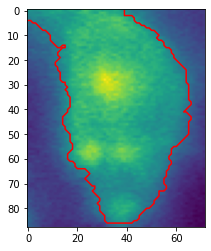

In [57]:
plt.imshow(cell_img)
xys = raw_nuclei_polys[0]
plt.plot(xys[:,1],xys[:,0],color='red')
plt.show()
plt.close()

In [1]:
import geopandas

In [19]:
gdf = geopandas.read_file('/scratch/groups/horence/rob/nextflow_workdirs/SLRRP_preprocessing/work/5b/ed98a01efe94fa8aedff23428f25a7/nuclei.gpkg')
gdf

,cell_id,area,sample,z,fov,geometry
0,221171052658124375230221468155561741130,4.717964,Liver1Slice2,zIndex_6,hdf5_fov2,"POLYGON ((1134.95978 527.68793, 1134.95978 526..."
1,286964630658931456564570513475233363803,31.929358,Liver1Slice2,zIndex_6,hdf5_fov2,"POLYGON ((1138.41573 502.20020, 1137.76774 500..."
2,62991594892622046313618234933196708912,31.701916,Liver1Slice2,zIndex_6,hdf5_fov2,"POLYGON ((1076.31672 514.94407, 1074.37275 512..."
3,181491296078091057167689647742161071610,24.715365,Liver1Slice2,zIndex_6,hdf5_fov3,"POLYGON ((804.94100 531.65717, 804.61700 529.8..."
4,293383934766840071776682436052125693329,50.836686,Liver2Slice1,zIndex_2,hdf5_fov1,"POLYGON ((3327.27854 -31.34532, 3327.27854 -32..."
...,...,...,...,...,...,...
323,316689737634594250718864825817488199652,3.289192,Liver2Slice1,zIndex_5,hdf5_fov2,"POLYGON ((3154.00536 54.85991, 3152.92537 53.6..."
324,224555390450576634897430551229609938418,41.983859,Liver2Slice1,zIndex_5,hdf5_fov3,"POLYGON ((2978.70597 72.39627, 2977.40998 67.6..."
325,129478685904225439956734995816959892263,3.464150,Liver2Slice1,zIndex_1,hdf5_fov2,"POLYGON ((3080.34991 -27.54332, 3079.91792 -28..."
326,130270349161009112198144541425297551427,64.244227,Liver2Slice1,zIndex_1,hdf5_fov2,"POLYGON ((3161.24131 122.25127, 3161.24131 120..."


In [15]:
gdf.to_file('test.gpkg', driver='GPKG', mode='a')

In [20]:
gdf.shape

(328, 6)

In [17]:
gdf = geopandas.read_file('test.gpkg')

# Splitting mosaics into fovs

In [1]:
import tifffile
import numpy as np
my_tiff = '/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif'

In [4]:
%%time
im = tifffile.imread(my_tiff)
sub_region_im = im[0:100,0:100]

CPU times: user 0 ns, sys: 6.68 s, total: 6.68 s
Wall time: 13.2 s


In [2]:
%%time
mm = tifffile.memmap(my_tiff)
sub_region_mm = mm[0:100,0:100]

CPU times: user 3.43 ms, sys: 3.16 ms, total: 6.59 ms
Wall time: 6.89 ms


In [5]:
np.array_equal(sub_region_im,sub_region_mm)

True

In [31]:
mosaic_df['sample'].nunique()

4

In [35]:
mosaic_df.iloc[0]['mosaic_path']

'/scratch/groups/horence/rob/data/vz_liver_showcase/Liver1Slice1/images/mosaic_DAPI_z0.tif'

In [23]:
import pandas as pd
mosaic_df = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/nuclei_segmentation/mosaics.csv',
)

fov_df = pd.read_csv(
    '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/nuclei_segmentation/fovs.csv',
)

fov_df

,sample,fov,path
0,Liver1Slice1,0,/scratch/groups/horence/rob/data/vz_liver_show...
1,Liver1Slice1,1000,/scratch/groups/horence/rob/data/vz_liver_show...
2,Liver1Slice1,1001,/scratch/groups/horence/rob/data/vz_liver_show...
3,Liver1Slice1,1002,/scratch/groups/horence/rob/data/vz_liver_show...
4,Liver1Slice1,1003,/scratch/groups/horence/rob/data/vz_liver_show...
...,...,...,...
5565,Liver2Slice2,997,/scratch/groups/horence/rob/data/vz_liver_show...
5566,Liver2Slice2,998,/scratch/groups/horence/rob/data/vz_liver_show...
5567,Liver2Slice2,999,/scratch/groups/horence/rob/data/vz_liver_show...
5568,Liver2Slice2,99,/scratch/groups/horence/rob/data/vz_liver_show...


In [2]:
import geopandas

In [11]:
gdf = geopandas.read_file('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/nuclei_segmentation/outputs/nuclei.gpkg')
gdf

,cell_id,area,sample,z,fov,geometry
0,10538862489920183892740369332272690020,48.089404,Liver1Slice2,zIndex_6,hdf5_fov10,"POLYGON ((4197.72703 5691.21075, 4195.78306 56..."
1,119121808228938070631623775185479032904,14.497970,Liver1Slice2,zIndex_6,hdf5_fov10,"POLYGON ((4187.79119 5788.19375, 4188.76317 57..."
2,119121808228938070631623775185479032904,2.910091,Liver1Slice2,zIndex_6,hdf5_fov10,"POLYGON ((4195.78306 5788.19375, 4192.86711 57..."
3,126432960480588954615687533268541756376,34.448716,Liver1Slice2,zIndex_6,hdf5_fov10,"POLYGON ((4061.43320 5613.34356, 4060.78521 56..."
4,330594197380057235309893434432323108852,47.675343,Liver1Slice2,zIndex_6,hdf5_fov10,"POLYGON ((4140.05595 5706.43860, 4139.40796 57..."
...,...,...,...,...,...,...
240345,34503263976804858829294532944856557993,4.490560,Liver2Slice2,zIndex_2,hdf5_fov998,"POLYGON ((5790.39797 7532.89453, 5790.18198 75..."
240346,50964793435670335808821289274915410024,1.842879,Liver2Slice2,zIndex_2,hdf5_fov998,"POLYGON ((5690.60679 7473.92711, 5689.95879 74..."
240347,225492492141914068199922541095653139650,1.912862,Liver2Slice2,zIndex_2,hdf5_fov999,"POLYGON ((5680.69372 7627.99945, 5680.26172 76..."
240348,329777031946884498576271084456653585882,82.422188,Liver2Slice2,zIndex_2,hdf5_fov999,"POLYGON ((5780.91690 7604.02368, 5778.43292 76..."


In [12]:
#expected nuclei area in um^2 (from radius of 2.5 um to 10 um)
gdf = gdf[gdf['area'].between(20,314)]
gdf.shape

(110964, 6)

In [15]:
gdf['z'].nunique()

7

In [16]:
filt_gdf = gdf.groupby('cell_id').filter(lambda g: g['z'].nunique() >= 7)
filt_gdf

,cell_id,area,sample,z,fov,geometry
6,275617183062489770189533844755293706717,60.662865,Liver1Slice2,zIndex_6,hdf5_fov100,"POLYGON ((646.84268 1312.68046, 646.08669 1309..."
12,129802607005689628360640308301834661069,56.230662,Liver1Slice2,zIndex_6,hdf5_fov1001,"POLYGON ((5917.06032 4807.46478, 5916.08834 48..."
17,176692979059042728723794779413379496506,37.148861,Liver1Slice2,zIndex_6,hdf5_fov1003,"POLYGON ((8034.77760 1366.83581, 8035.31759 13..."
20,329124375138518603965742273211085004978,27.258049,Liver1Slice2,zIndex_6,hdf5_fov1003,"POLYGON ((8070.63303 1179.34976, 8070.63303 11..."
22,49327393931413703088962217672698009210,50.602930,Liver1Slice2,zIndex_6,hdf5_fov1003,"POLYGON ((8001.94613 1164.55391, 8001.40613 11..."
...,...,...,...,...,...,...
240284,55125352260756878139961621511378889493,71.452391,Liver2Slice2,zIndex_2,hdf5_fov992,"POLYGON ((5774.37190 6303.79392, 5774.04790 63..."
240306,35593402438050783861593922874923543731,61.188254,Liver2Slice2,zIndex_2,hdf5_fov995,"POLYGON ((5691.77475 6857.36644, 5691.34275 68..."
240331,276531294564402617632399254381912108806,86.457860,Liver2Slice2,zIndex_2,hdf5_fov997,"POLYGON ((5653.53865 7235.88541, 5653.21465 72..."
240332,318383171094453317375798641134276600622,51.798901,Liver2Slice2,zIndex_2,hdf5_fov997,"POLYGON ((5776.76565 7198.73377, 5776.11765 71..."


In [17]:
filt_gdf['cell_id'].nunique()

2591